In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-79.36090822325762 158.32716732583623
-41.23191478317456 -157.8377877265887
-38.88335388080697 53.94701413454035
-51.24119815130426 -89.98159637361002
10.246535687503737 -164.97368484706837
-79.15366574535823 135.02942741507786
-70.06075578691322 37.701397865982074
34.209428777946684 12.055476994030357
-43.50040444945795 136.04410459827164
29.8671638985211 -177.6433221741091
22.47367576233114 -17.532620380368144
-72.22297508326278 49.75976105917783
-60.93149736397811 -177.63837957118454
-58.02435606812246 -50.74836781419995
45.26691354237033 2.923689889336572
-9.930533464430454 -90.66918538463591
-3.01442384467785 -174.09262201912338
21.674772463056925 26.253837551599048
-30.418284920258458 -148.11372232249175
-76.56247548605569 -157.79506132843943
-39.9401180018636 10.399885334419707
9.89535356273501 149.07824251115812
-4.571826970112923 155.12324828917542
48.2224567744712 163.3988985167225
-28.705385202626516 75.96825107749007
-49.230471736254714 -111.14023239012072
-63.4607001340648

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | makakilo city
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | jarjis
City not found. Skipping...
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | nouadhibou
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | issoire
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | marawi
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | arawa
Pro

Processing Record 39 of Set 4 | ucluelet
Processing Record 40 of Set 4 | saint stephen
Processing Record 41 of Set 4 | bongor
Processing Record 42 of Set 4 | marang
Processing Record 43 of Set 4 | pinos
Processing Record 44 of Set 4 | karpogory
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | pecos
Processing Record 48 of Set 4 | kathu
Processing Record 49 of Set 4 | pangai
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | tombouctou
Processing Record 2 of Set 5 | hearst
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | verkhnyaya inta
Processing Record 5 of Set 5 | ulaangom
Processing Record 6 of Set 5 | sherlovaya gora
Processing Record 7 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | kjollefjord
Processing Record 10 of Set 5 | iqaluit
Proce

Processing Record 28 of Set 8 | phan thiet
Processing Record 29 of Set 8 | sorland
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | porosozero
Processing Record 32 of Set 8 | leningradskiy
Processing Record 33 of Set 8 | tual
Processing Record 34 of Set 8 | valdivia
Processing Record 35 of Set 8 | haltern
Processing Record 36 of Set 8 | dubbo
Processing Record 37 of Set 8 | saleaula
City not found. Skipping...
Processing Record 38 of Set 8 | helong
Processing Record 39 of Set 8 | boa vista
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | kongoussi
Processing Record 42 of Set 8 | khani
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | andenes
Processing Record 45 of Set 8 | shache
Processing Record 46 of Set 8 | camocim
Processing Record 47 of Set 8 | shingu
Processing Record 48 of Set 8 | usinsk
Processing Record 49 of Set 8 | sioux lookout
Processing Record 50 of Set 8 | the valley
Processing Record 1 of Set 9 | conse

Processing Record 14 of Set 12 | unguia
Processing Record 15 of Set 12 | severo-yeniseyskiy
Processing Record 16 of Set 12 | rocha
Processing Record 17 of Set 12 | turayf
Processing Record 18 of Set 12 | diapaga
Processing Record 19 of Set 12 | toyoake
Processing Record 20 of Set 12 | camacupa
Processing Record 21 of Set 12 | longkou
Processing Record 22 of Set 12 | sozimskiy
Processing Record 23 of Set 12 | villa bruzual
Processing Record 24 of Set 12 | porto torres
Processing Record 25 of Set 12 | seoul
Processing Record 26 of Set 12 | puerto escondido
Processing Record 27 of Set 12 | kirakira
Processing Record 28 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 29 of Set 12 | fuente palmera
Processing Record 30 of Set 12 | minot
Processing Record 31 of Set 12 | abha
Processing Record 32 of Set 12 | humberto de campos
Processing Record 33 of Set 12 | taltal
Processing Record 34 of Set 12 | tiarei
Processing Record 35 of Set 12 | amalapuram
Processing Record 36 of S

In [12]:
city_data.len()

AttributeError: 'list' object has no attribute 'len'

In [13]:
city_data_df.len()

NameError: name 'city_data_df' is not defined

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,47.80,75,74,12.91,NZ,2022-07-14 01:10:22
1,Mataura,-46.1927,168.8643,47.48,89,41,5.01,NZ,2022-07-14 01:10:22
2,Castro,-24.7911,-50.0119,52.79,96,100,8.63,BR,2022-07-14 01:10:23
3,Makakilo City,21.3469,-158.0858,82.72,67,75,21.85,US,2022-07-14 01:10:23
4,Hobart,-42.8794,147.3294,48.25,80,75,11.50,AU,2022-07-14 01:10:23
5,Port Alfred,-33.5906,26.8910,55.18,74,0,4.00,ZA,2022-07-14 01:10:24
6,Mount Gambier,-37.8333,140.7667,52.70,73,100,2.26,AU,2022-07-14 01:10:24
7,Kapaa,22.0752,-159.3190,85.98,73,20,17.27,US,2022-07-14 01:10:24
8,Nouadhibou,20.9310,-17.0347,67.71,86,49,24.49,MR,2022-07-14 01:10:25
9,East London,-33.0153,27.9116,57.99,73,0,9.42,ZA,2022-07-14 01:06:21


In [15]:
print(city_data_df)

                              City      Lat       Lng  Max Temp  Humidity  \
0                            Bluff -46.6000  168.3333     47.80        75   
1                          Mataura -46.1927  168.8643     47.48        89   
2                           Castro -24.7911  -50.0119     52.79        96   
3                    Makakilo City  21.3469 -158.0858     82.72        67   
4                           Hobart -42.8794  147.3294     48.25        80   
..                             ...      ...       ...       ...       ...   
564  Libertador General San Martin -23.8064  -64.7876     50.97        52   
565                  San Policarpo  12.1791  125.5072     83.12        79   
566                      Lafayette  30.2335  -92.0668     86.13        79   
567                         Yarada  17.6500   83.2667     79.12        78   
568                        Sakakah  29.9697   40.2064     87.37        24   

     Cloudiness  Wind Speed Country                 Date  
0            74 

In [16]:
city_data_df.len()

AttributeError: 'DataFrame' object has no attribute 'len'

In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-14 01:10:22,-46.6000,168.3333,47.80,75,74,12.91
1,Mataura,NZ,2022-07-14 01:10:22,-46.1927,168.8643,47.48,89,41,5.01
2,Castro,BR,2022-07-14 01:10:23,-24.7911,-50.0119,52.79,96,100,8.63
3,Makakilo City,US,2022-07-14 01:10:23,21.3469,-158.0858,82.72,67,75,21.85
4,Hobart,AU,2022-07-14 01:10:23,-42.8794,147.3294,48.25,80,75,11.50
...,...,...,...,...,...,...,...,...,...
564,Libertador General San Martin,AR,2022-07-14 01:25:12,-23.8064,-64.7876,50.97,52,78,3.56
565,San Policarpo,PH,2022-07-14 01:25:13,12.1791,125.5072,83.12,79,84,3.65
566,Lafayette,US,2022-07-14 01:21:59,30.2335,-92.0668,86.13,79,0,9.22
567,Yarada,IN,2022-07-14 01:25:13,17.6500,83.2667,79.12,78,75,10.36


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

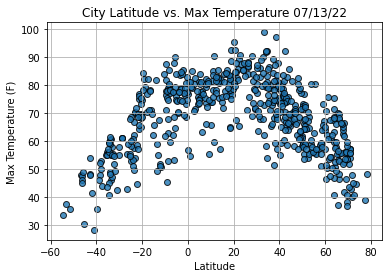

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

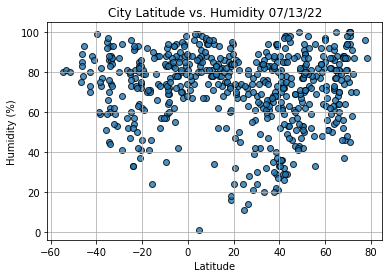

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

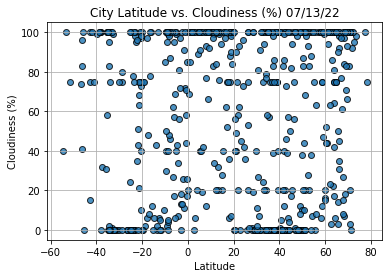

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

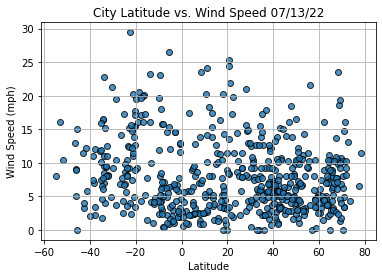

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]

In [29]:
index13

City                San Cristobal
Country                        VE
Date          2022-07-14 01:06:24
Lat                        7.7669
Lng                       -72.225
Max Temp                    73.58
Humidity                       88
Cloudiness                     77
Wind Speed                   2.55
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
564    False
565     True
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Makakilo City,US,2022-07-14 01:10:23,21.3469,-158.0858,82.72,67,75,21.85
7,Kapaa,US,2022-07-14 01:10:24,22.0752,-159.3190,85.98,73,20,17.27
8,Nouadhibou,MR,2022-07-14 01:10:25,20.9310,-17.0347,67.71,86,49,24.49
12,Issoire,FR,2022-07-14 01:10:26,45.5500,3.2500,67.26,56,94,4.47
13,San Cristobal,VE,2022-07-14 01:06:24,7.7669,-72.2250,73.58,88,77,2.55


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

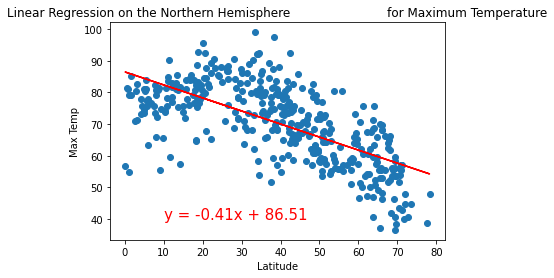

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

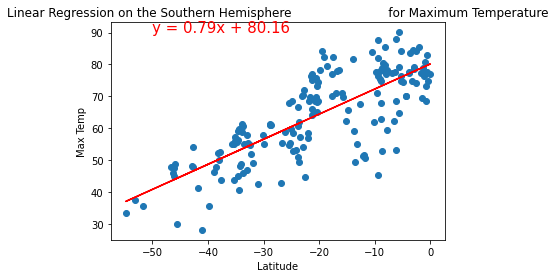

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

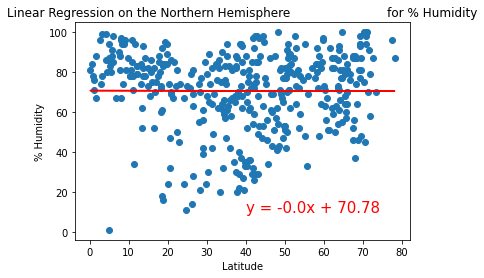

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

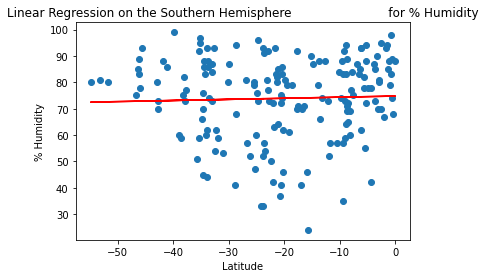

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

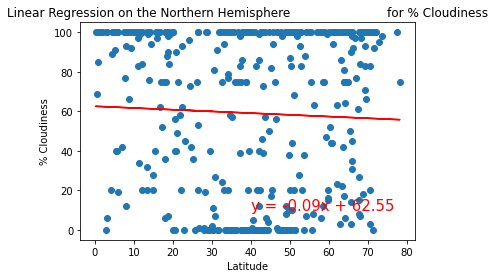

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

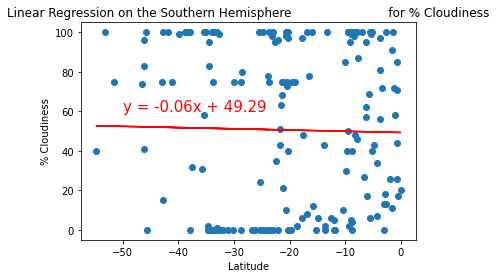

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

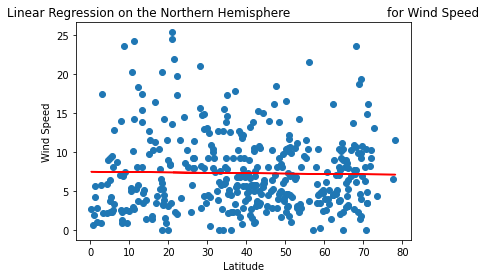

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

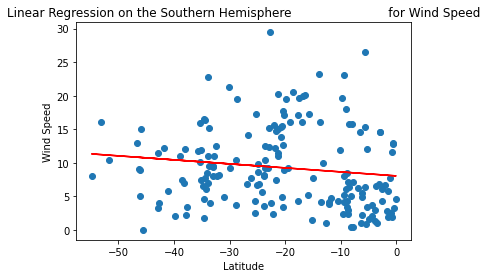

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))